In [333]:
import numpy as np
import TMQGP as tm
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad
from scipy import signal
import tqdm

In [334]:
omrange = np.linspace(-2,2, 200)
m1 = 0.325
lambda4 = 2*np.sqrt(0.651**2 + m1**2)

## Analytic Solution for polarization operator

In [3]:
#Fixed Inputs parameters
a0=6.75
a1=-1.95
a2=2.625
a3=-7.44
b3=0.75
b4=7.5
T0=0.27 #GeV #Critical point in purely gluonic field
Nf=3 #Number of quark flavor
G=10.08 #(GeV)^2
m0=5.5/1000 #MeV Current quark mass
m1=500/1000 #MeV Constituent quark mass
 #Change it afterwards
Nc=2 #May change afterwards
Λ=0.651 #Cutoff Momentum 

#Fermi Dirac distribution function
def f(E,β):
    return 1/(1+np.exp(β*E))


#Imaginary part of pion polarization operator 
def ImP(ω,u,T,m=0.325): #made m as argument,where if I don't put the value of m while calling the function, it will be assumed as 0.325  
    β=1/T
    if ω==0:
        return 0
   #res=Nc*Nf*ω**2/8*np.pi
    #res*=(1-4*m1**2/ω**2)**0.5
    return np.nan_to_num((np.sign(ω)*Nc*Nf*ω*(((ω**2-(2*m)**2))**0.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*np.pi))
#
#Getting the real part using Kramer Kronig's rules
def ReP(ω,u,T,m=0.325):
    f= lambda ω0:(ImP(ω0,0,T,m)/np.pi)
    return quad(f,-10,10,weight='cauchy',wvar=ω)[0]

def ImS(ω,u,T,m=0.325):
    β=1/T
    if ω==0:
        return 0
    return np.nan_to_num((np.sign(ω)*Nc*Nf*((ω**2 - (2*m)**2)**1.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*ω*np.pi))


def ReS(ω,u,T,m=0.325):
    f= lambda ω0:(ImS(ω0,0,T,m)/np.pi)
    return quad(f,-10,10,weight='cauchy',wvar=ω)[0]

In [4]:
Impp=[ImP(s,0,0.001) for s in omrange]
Impp = np.array(Impp)

/tmp/ipykernel_780082/1260825283.py:29: RuntimeWarning: invalid value encountered in scalar power
  return np.nan_to_num((np.sign(ω)*Nc*Nf*ω*(((ω**2-(2*m)**2))**0.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*np.pi))
/tmp/ipykernel_780082/1260825283.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(β*E))


In [5]:
Imss=[ImS(s,0,0.001) for s in omrange]
Imss = np.array(Imss)

/tmp/ipykernel_780082/1260825283.py:40: RuntimeWarning: invalid value encountered in scalar power
  return np.nan_to_num((np.sign(ω)*Nc*Nf*((ω**2 - (2*m)**2)**1.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*ω*np.pi))
/tmp/ipykernel_780082/1260825283.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(β*E))


In [6]:
Repp=[ReP(s,0,0.05) for s in omrange]
Repp = np.array(Repp)

/home/hshah21/jupy/jup_notebook/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:638: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qawce(func, a, b, wvar, args, full_output,
/tmp/ipykernel_780082/1260825283.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f,-10,10,weight='cauchy',wvar=ω)[0]


In [7]:
Ress = [ReS(s,0,0.001) for s in omrange]
Ress = np.array(Ress)

/tmp/ipykernel_780082/1260825283.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(β*E))
/tmp/ipykernel_780082/1260825283.py:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f,-10,10,weight='cauchy',wvar=ω)[0]


# Hatsuda Integral Calculations : 6.31

$$Tr \int \frac{d^4 p}{(2\pi)^4} tanh(\frac{p^0}{2T})\Gamma_\alpha \left[G_0^R(p^0 + \omega, p + q)\Gamma_\alpha Im G_0^R(p^0, p) + Im G_0^R(p^0, p)\Gamma_\alpha G_0^R(p^0 - \omega, p - q)  \right] $$

Solving this, we get an integral of the form 

$$ \int \frac{dp dp_0 4*4*p^2(4m^2 - 4p_0^2 - 4p^2)}{(2\pi)^3} tanh(\frac{p^0}{2T})  $$

In [8]:
Fp_array = [tm.F_p(i, 0, 0.001, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)]

/tmp/ipykernel_780082/900299313.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Fp_array = [tm.F_p(i, 0, 0.001, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)]


  0%|          | 0/200 [00:00<?, ?it/s]

In [9]:
Fp_array = np.array(Fp_array)

(0.0, 3.0)

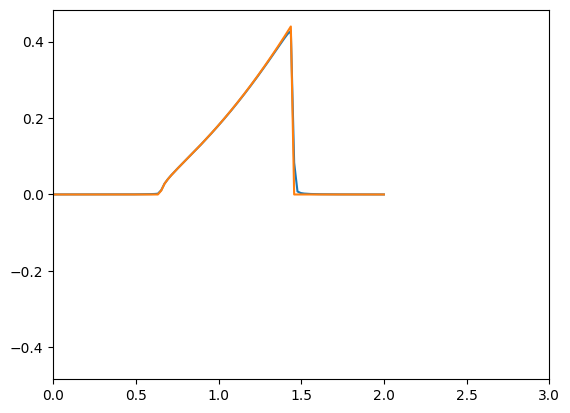

In [10]:
plt. plot(omrange, Fp_array)
plt.plot(omrange, Impp)
plt.xlim(0,3)

In [15]:
#double F(double omega,double q,double T,double m,double eps)
Fs_array = np.array([tm.F_s(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_780082/4294221021.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Fs_array = np.array([tm.F_s(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

In [16]:
Fs_array = np.array(Fs_array)

In [11]:
iIm = tm.Interpolator(omrange,  np.ascontiguousarray(Fp_array), 'cubic')

In [12]:
Real_array = np.array([tm.Re_meson(i,lambda4, iIm) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_780082/2734502653.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Real_array = np.array([tm.Re_meson(i,lambda4, iIm) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

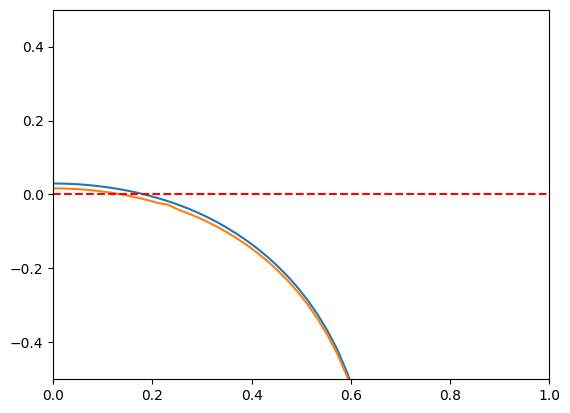

In [13]:
plt.plot(omrange, 1 - G* Real_array)
plt.plot(omrange, 1 - G*Repp)
plt.ylim(-0.5, 0.5)
plt.xlim(0,1)
plt.axhline(0, color='red', linestyle='--')


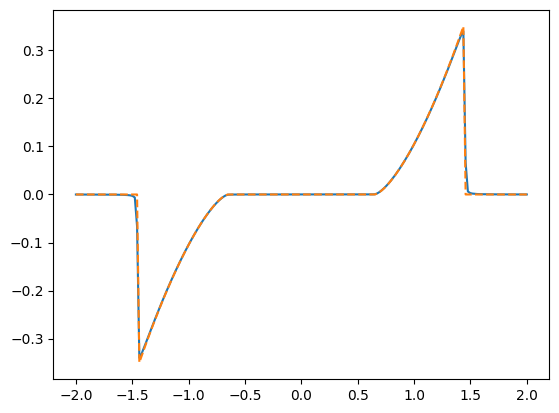

In [17]:
plt. plot(omrange, -Fs_array)
plt.plot(omrange, Imss, ls = '--')
#plt.xlim(0, 2)
#plt.ylim(0,0.2)

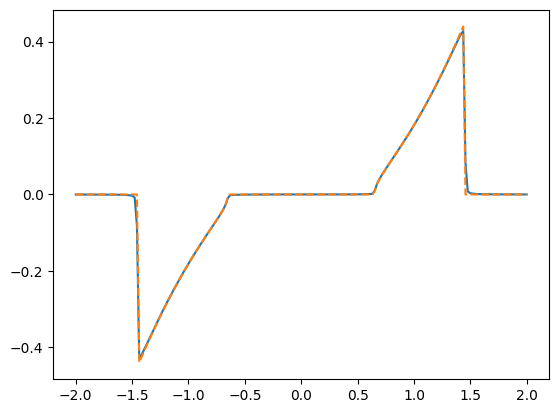

In [18]:
#plt.plot(omrange, -Fs_array)
plt.plot(omrange, Fp_array)
plt.plot(omrange, Impp, ls = '--')
#plt.plot(omrange, Imss)

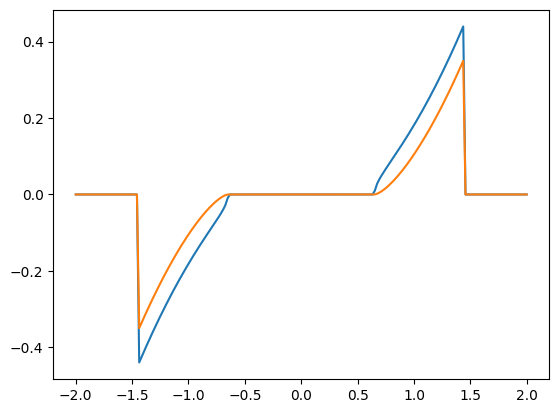

In [19]:
plt.plot(omrange, Impp)
plt.plot(omrange, Imss)

# Increasing eps plots

In [ ]:
##double F(double omega,double q,double T,double m,double eps)

In [12]:
#omrange1= np.linspace(0, 0.4, 150)

In [5]:
F_array_1 = np.array([tm.F_p(i, 0, 0.05, 0.134, 0.001) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_100827/362997221.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  F_array_1 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [28]:
F_array_2 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.01) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_523366/3899067796.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  F_array_2 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.01) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

In [11]:
F_array_3 = np.array([tm.F_p(i, 0, 0.05, 0.134, 0.05) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_102392/1446035371.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  F_array_3 = np.array([tm.F_p(i, 0, 0.05, 0.134, 0.05) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
#F_array_1 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])

In [12]:
iIm_1 = tm.Interpolator(omrange,  np.ascontiguousarray(F_array_1), 'cubic')

NameError: name 'F_array_1' is not defined

In [31]:
iIm_2 = tm.Interpolator(omrange,  np.ascontiguousarray(F_array_2), 'cubic')

In [4]:
iIm_3 = tm.Interpolator(omrange,  np.ascontiguousarray(F_array_3), 'cubic')

In [16]:
Real_array_1 = np.array([tm.Re_meson(i,lambda4, iIm_1) for i in omrange])

In [34]:
Real_array_2 = np.array([tm.Re_meson(i,lambda4, iIm_2) for i in omrange1])

In [22]:
Real_array_3 = np.array([tm.Re_meson(i,lambda4, iIm_3) for i in omrange])

In [27]:
plt.plot(omrange, F_array_1)

NameError: name 'F_array_1' is not defined

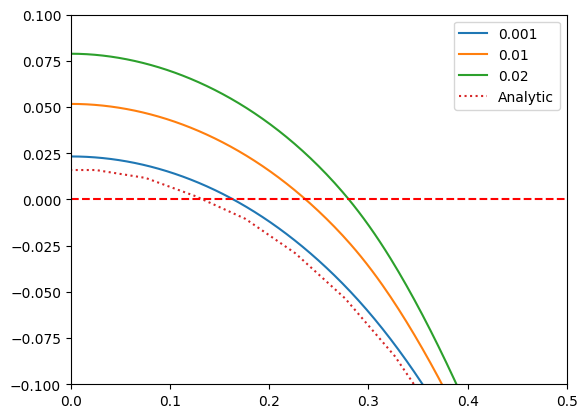

In [41]:
plt.plot(omrange1,1 - G* Real_array_1, label = '0.001')
plt.plot(omrange1,1 - G* Real_array_2, label = '0.01')
plt.plot(omrange1,1 - G* Real_array_3, label = '0.02')
plt.plot(omrange, 1 - G* Repp, label = 'Analytic', ls = 'dotted')
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='red', linestyle='--')
plt.xlim(0, 0.5)
plt.legend()
plt.show()


## Plotting Spectral Function

(-2.0, 2.0)

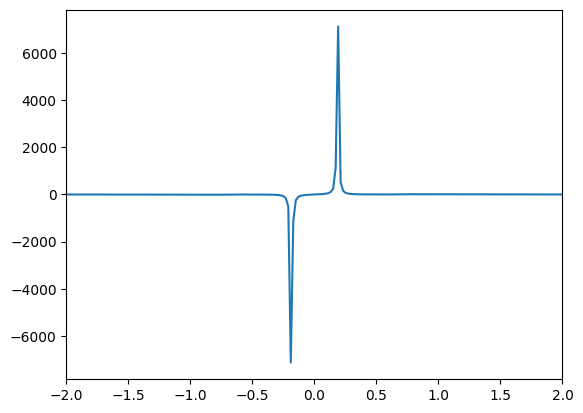

In [17]:
eps = 0.001
Ds = [re + 1j*im + 1j*eps*om  for re, im , om in zip(Real_array_1 , F_array_1, omrange)]
result = [-2 * np.imag( -G/ (1 - G * d)) for d in Ds]
plt.plot(omrange, result)
plt.xlim(-2 ,2 )


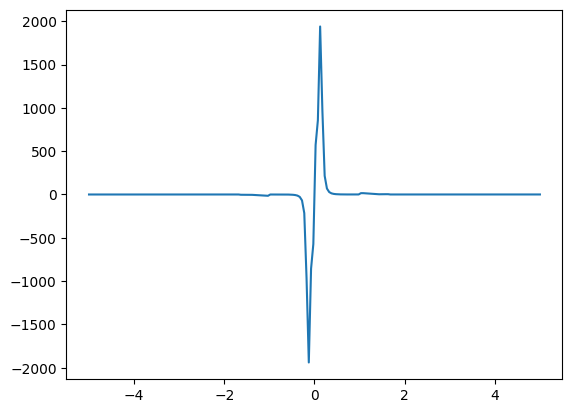

In [15]:
Ds_a = [re + 1j*im + 1j*eps*np.sign(om) for im,re,om in zip(Impp, Repp, omrange)]
result = [-2 * np.imag(-G / (1 - G * d)) for d in Ds_a]
plt.plot(omrange, result)


# Plotting ImPi and minima of SF wrt omega at diff widths

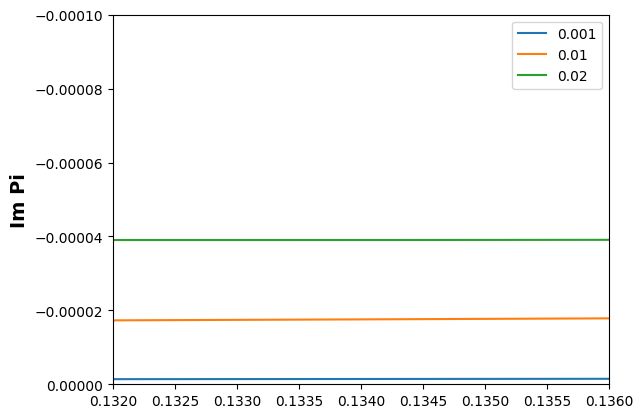

In [28]:
plt.plot(omrange1, F_array_1, label = '0.001')
plt.plot(omrange1, F_array_2,label = '0.01')
plt.plot(omrange1, F_array_3,label = '0.02')
plt.ylabel('Im Pi', fontsize=14, fontweight='bold')
plt.xlim(0.132,0.136)
plt.ylim(0, -0.0001)
plt.legend()
plt.show()


## Hatsuda Integral with interpolator

In [5]:
def G(p0,p,m,eps=0.05):
    return 1/( p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0))

p0range = np.linspace(-1.641,1.641,550)
prange = np.linspace(0,0.651,350)
ImG = [G(s,0,0.5) for s in p0range]

In [6]:
G_array = np.array([[G(p0,p,0.325) for p in prange] for p0 in p0range])
new_ImG_imag = tm.Interpolator2D(prange,p0range,np.ascontiguousarray(np.imag(G_array)))


In [ ]:
#( double omega,double T,double m, double lambda, Interpolator2D & ImG)
ImPi=[tm.imag_pi_inter1(s,0.05, 0.325, 0.651, new_ImG_imag) for s in tqdm.tqdm_notebook(omrange)]  

NameError: name 'F_array_3' is not defined

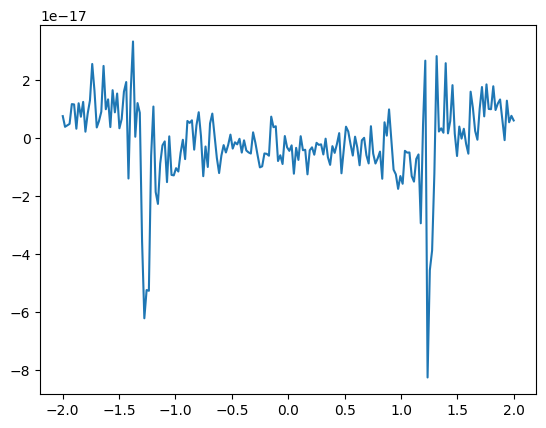

In [61]:
plt.plot(omrange, ImPi_real)
plt.plot(omrange, F_array_3)

In [27]:
iImPi = tm.Interpolator(omrange,  np.ascontiguousarray(ImPi), 'cubic')
RePi = np.array([tm.Re_meson(i,lambda4, iImPi) for i in omrange])
RePi = np.array(RePi)

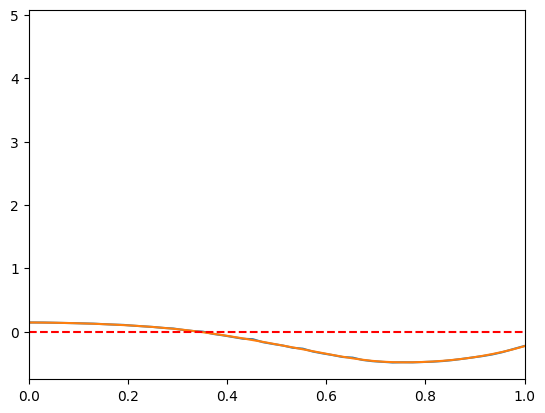

In [28]:
plt.plot(omrange, 1 - 10.08*RePi)
plt.plot(omrange, 1-10.08*Real_array_3)
plt.xlim(0,1)
plt.axhline(0, color='red', linestyle='--')

## Kitazawa Calculations in C++

In [180]:
def Gk(p0,p,m,eps=0.001):
    return 1/( p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0))

p0range = np.linspace(-1.641,1.641,550)
prange = np.linspace(0,0.651,350)

In [30]:
Gk_array = np.array([[Gk(p0,p,0.134) for p in prange] for p0 in p0range])
ImGk = tm.Interpolator2D(prange,p0range,np.ascontiguousarray(np.imag(Gk_array)))

In [11]:
tm.Sigma_re_minus1(0,0.1,0.5,0.1,ImGk, iIm_3) # + tm.Sigma_re_plus1(0.01,0.1,0.5,0.1,0.1,ImGk)

-6.374413015014967e-07

In [15]:
srp1_array =[tm.Sigma_re_plus1(i,0.1,0.5,0.651,ImGk, iIm_3 ) + tm.Sigma_re_minus1(i,0.1,0.5,0.651,ImGk, iIm_3 ) for i in tqdm.tqdm_notebook(omrange)]

/tmp/ipykernel_102392/658606901.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  srp1_array =[tm.Sigma_re_plus1(i,0.1,0.5,0.651,ImGk, iIm_3 ) + tm.Sigma_re_minus1(i,0.1,0.5,0.651,ImGk, iIm_3 ) for i in tqdm.tqdm_notebook(omrange)]


  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
#double Sigma_re_plus1(double p0, double T, double m, double lambda,Interpolator2D & ImG)
#srp1_array = [(tm.Sigma_re_plus1(i,0.01,0.5,0.651,ImGk) + tm.Sigma_re_minus1(i,0.01,0.5,0.651,ImGk)) for i in tqdm.tqdm_notebook(omrange)]

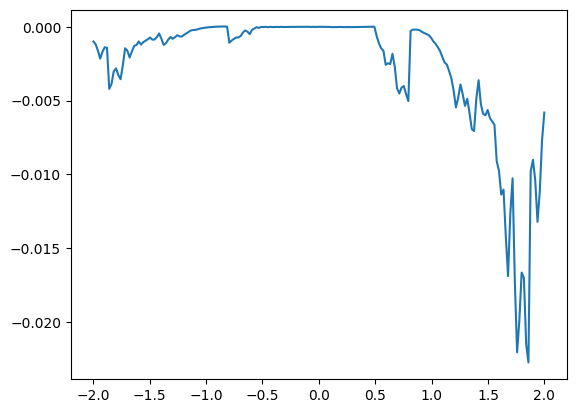

In [16]:
plt.plot(omrange, srp1_array)
#plt.xlim(-0.5,0.5)
#plt.ylim(-1.3,1.3)

## Kitazawa Calculations in Python

In [152]:
def Gk(p0,p,m,eps=0.001):
    return np.imag(1/( p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0)))

In [56]:
def Integral1(p0, q, T, m, eps):
    Eq = np.sqrt(q**2 + m**2)
    #return np.imag(Gk(-Eq+p0,q,0.134,eps))*(1 + m/Eq)*(1/np.tanh((-Eq + p0)/2/T) + np.tanh(Eq/2/T) )*q**2 /8/np.pi**2
    return np.imag(Gk(p0-Eq,q,0.134,eps))*(1 - m/Eq)*(1/np.tanh((-Eq + p0)/2/T) + np.tanh(Eq/2/T) )*q**2 /8/np.pi**2

In [2]:
Integral1(1,0,0.1,0.5,0.01)

NameError: name 'np' is not defined

In [57]:
def Integral2(p0, q, T, m, eps):
    Eq = np.sqrt(q**2 + m**2)
    return np.imag(Gk(Eq+p0,q,0.134,eps))*(1 + m/Eq)*(1/np.tanh((Eq + p0)/2/T) + np.tanh(-Eq/2/T) ) *q**2 /8/np.pi**2 

In [58]:
def Sigma_re_plus1(p0, T, m, eps):
    f=lambda i:Integral1(p0,i,T,m,eps)
    return quad(f,-0.631,0.631)[0]
        

In [59]:
def Sigma_re_plus2(p0, T, m, eps):
    f=lambda i:Integral2(p0,i,T,m,eps)
    return quad(f,-0.631,0.631)[0]

In [60]:
p0range1 = np.linspace(-2,2,300)

In [65]:
res_array = [(Sigma_re_plus1(i,0.2,0.5,0.001) + Sigma_re_plus2(i,0.2,0.5,0.001)) for i in tqdm.tqdm_notebook(p0range1)]

/tmp/ipykernel_102392/698023809.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  res_array = [(Sigma_re_plus1(i,0.2,0.5,0.001) + Sigma_re_plus2(i,0.2,0.5,0.001)) for i in tqdm.tqdm_notebook(p0range1)]


  0%|          | 0/300 [00:00<?, ?it/s]

/tmp/ipykernel_102392/1053681871.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f,-0.631,0.631)[0]
/tmp/ipykernel_102392/1053681871.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(f,-0.631,0.631)[0]


(0.0, 1.0)

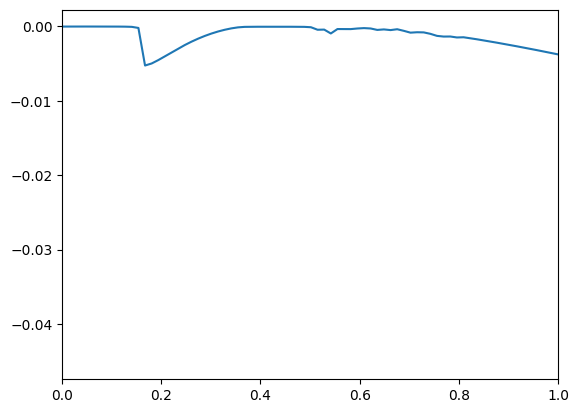

In [67]:
plt.plot(p0range1, res_array)
plt.xlim(0,1)

## Analytic Calculutions

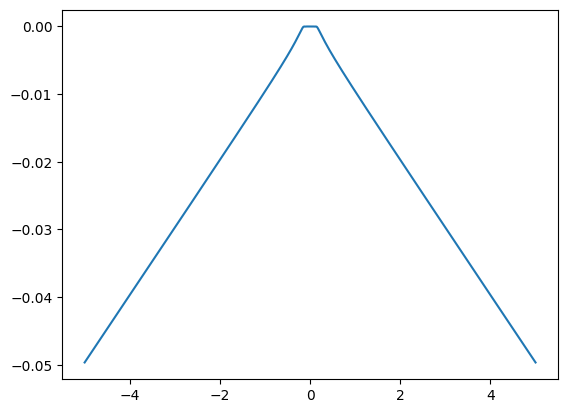

In [128]:
def SigmaP(ω, mf, mb, T):
    g= 10.08
    mp = mf + mb
    mm = abs(mf-mb)
    res =  -(np.heaviside(ω**2 - mp**2, 0.5) - np.heaviside(mm**2 - ω**2,0.5))*(mp + ω)*(ω - mm)*np.sqrt((ω**2 - mm**2)*(ω**2 - mp**2))*(1/(np.tanh((ω**2 + mm*mp)/4/ω/T)) + np.tanh((ω**2 - mm*mp)/4/ω/T))/64/np.pi/ω**3
    return np.nan_to_num(res)
    #return -(g**2) * (np.heaviside(ω**2 - mp**2, 0.5) - np.heaviside(mm**2 - ω**2,0.5)) #*(ω + mp)*(ω - mm)*np.sqrt(ω**2 - mm**2)*np.sqrt(ω**2 - mp**2)*(1/(np.tanh((ω**2 + mm*mp)/4/ω/T)) + np.tanh((ω**2 - mm*mp)/4/ω/T))/64/np.pi/ω**3
    #return -(g**2) * ((ω**2 - mf**2)**2) * (np.tanh((ω**2 - mf**2)/4/T/ω) + 1/np.tanh((ω**2 + mf**2)/4/T/ω))/64/np.pi/ω**3
ωrange = np.linspace(-5, 5, 500)

SigmaP_array = np.array([SigmaP(i, 0, 0.134, 0.01) for i in ωrange])#Sigma     #[SigmaP(i, 1, 0, 0.1) for i in ωrange]
SigmaS_array = np.array([SigmaP(-i, 0, 0.134, 0.01) for i in ωrange])#pions

plt.plot(ωrange, SigmaP_array)
#plt.xlim(-1,1)

In [129]:
plt.plot(p0range1, res_array)
plt.plot(ωrange, SigmaP_array)
#plt.xlim(-1,1)

NameError: name 'p0range1' is not defined

# Equation 61 third term loops:

## Analytic

/tmp/ipykernel_61580/3906641415.py:6: RuntimeWarning: invalid value encountered in sqrt
  res *=(mp -  ω)*(mm + ω)*np.sqrt((ω**2 - mm**2)*(ω**2 - mp**2))/64/np.pi/ω**3


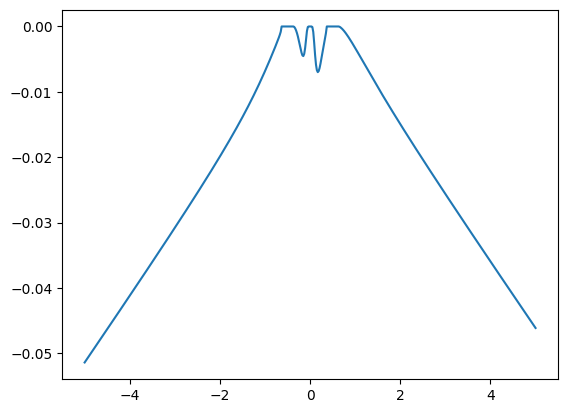

In [3]:
def SigmaPS(ω, mf, mb, T):

    mp = mf + mb
    mm = abs(mf-mb)
    res =  (np.heaviside(ω**2 - mp**2, 0.5) - np.heaviside(mm**2 - ω**2,0.5))
    res *=(mp -  ω)*(mm + ω)*np.sqrt((ω**2 - mm**2)*(ω**2 - mp**2))/64/np.pi/ω**3
    res *=(1/(np.tanh((ω**2 + mm*mp)/4/ω/T)) + np.tanh((ω**2 - mm*mp)/4/ω/T))
    return np.nan_to_num(res)
    
ωrange = np.linspace(-5, 5, 500)

SigmaPS_array = np.array([SigmaPS(i, 0.5, 0.134, 0.2) for i in ωrange])#Sigma     #[SigmaP(i, 1, 0, 0.1) for i in ωrange]
#SigmaS_array = np.array([SigmaP(-i, 0., 0.134, 0.01) for i in ωrange])#pions

plt.plot(ωrange, SigmaPS_array)
#plt.xlim(-1,1)

## Numerics

In [9]:
def funct_tt1( p, mf,eps, T, eta=0.001):
    β = 1/T
    Ep = np.sqrt(p**2 + mf**2)
    coeff= -(4*(np.pi)*p**2)*(Ep - mf)
    deno = (4*Ep* np.sqrt(p**2 + 0.134**2))*(2*np.pi)**3
    delta = -np.imag(1/(eps - np.sqrt(p**2 + 0.134**2) - Ep + 1j*eta))
    dist = 1 - 1/(np.exp(β*(eps-Ep)) + 1) + 1/(np.exp(β*(eps-Ep)) - 1)
    return coeff * dist * delta/deno

In [10]:
def py_tt1(mf, eps, T):
    f = lambda i: funct_tt1(i, mf, eps, T)
    return quad(f, 0,5)[0]

In [11]:
def funct_tt2( p, mf,eps, T, eta=0.001):
    β = 1/T
    Ep = np.sqrt(p**2 + mf**2)
    coeff= (4*(np.pi)*p**2)*(Ep + mf)
    deno = (4*Ep* np.sqrt(p**2 + 0.134**2))*(2*np.pi)**3
    delta = -np.imag(1/(eps + np.sqrt(p**2 + 0.134**2) + Ep + 1j*eta))
    dist = 1 - 1/(np.exp(β*(eps-Ep)) + 1) + 1/(np.exp(β*(eps-Ep)) - 1)
    return coeff * dist * delta/deno

In [12]:
def py_tt2(mf, eps, T):
    f = lambda i: funct_tt2(i, mf, eps, T)
    return quad(f, 0,5)[0]

In [13]:
epsrange = np.linspace(-5, 5, 500)

In [17]:
#py_tt_arr2 = np.array([py_tt2(0.1, i , 0.01) for i in tqdm.tqdm_notebook(epsrange)])

In [15]:
py_tt_arr = np.array([py_tt1(0.5, i , 0.2) + py_tt2(0.5, i , 0.2) for i in tqdm.tqdm_notebook(epsrange)])

/tmp/ipykernel_61580/1301459793.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  py_tt_arr = np.array([py_tt1(0.5, i , 0.2) + py_tt2(0.5, i , 0.2) for i in tqdm.tqdm_notebook(epsrange)])


  0%|          | 0/500 [00:00<?, ?it/s]

/tmp/ipykernel_61580/176474682.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(f, 0,5)[0]
/tmp/ipykernel_61580/176474682.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f, 0,5)[0]
/tmp/ipykernel_61580/1932202140.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  dist = 1 - 1/(np.exp(β*(eps-Ep)) + 1) + 1/(np.exp(β*(eps-Ep)) - 1)
/tmp/ipykernel_61580/176474682.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the re

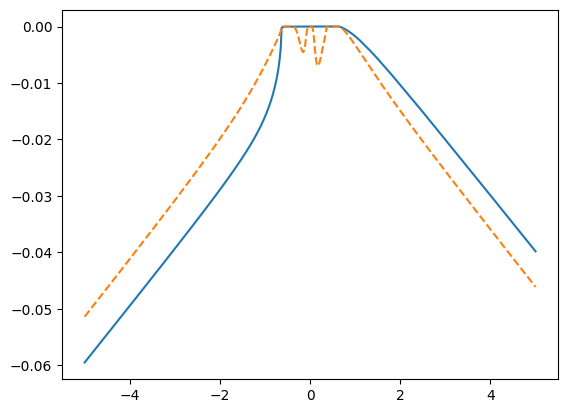

In [16]:
plt.plot(epsrange, py_tt_arr)
plt.plot(ωrange, SigmaPS_array, ls='--')
#plt.xlim(0,1.5)
#plt.ylim(0,0.005)
#plt.semilogy()
#plt.plot(epsrange, py_tt_arr2)
#plt.xlim(1.6,1.9)
#plt.ylim(-10, 10)

## Numerics Kitazawa 2014

In [392]:
def G_pi(p0, p, m, eps=0.0001):
    #return np.imag(1/(p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0)))
    return np.imag(1/(p0 - np.sqrt(p**2 + m**2) - 1j*eps))/2/np.sqrt(p**2 + m**2)

In [393]:
def Integrand1(p0 , p, mf, T):
    Ep = np.sqrt(p**2 + mf**2)
    mb = 0.134
    res = p**2 *(1 - mf/Ep)/8/np.pi/np.pi
    res *= (1/np.tanh((p0 - Ep)/2/T) + np.tanh(Ep/2/T))
    res *= G_pi(p0 - Ep, p, mb)
    return res

In [394]:
def Integral_1(p0, mf, T):
    f = lambda i:Integrand1(p0, i, mf, T)
    return quad(f, 0,2)[0]

In [395]:
frange = np.linspace(-5, 5, 500)

In [396]:
#array = [Integral_1(i, 0.1, 0.01) for i in tqdm.tqdm_notebook(frange)]

In [387]:
#plt.plot(frange, array)
#plt.plot(epsrange, -SigmaPS_array, ls = '--')
#plt.xlim(0,3)

In [397]:
def Integrand2(p0 , p, mf, T):
    Ep = np.sqrt(p**2 + mf**2)
    mb = 0.134
    res =  p**2 *(1 + mf/Ep)/8/np.pi/np.pi
    res *= (1/np.tanh((p0 + Ep)/2/T) + np.tanh(-Ep/2/T))
    res *= G_pi(p0 + Ep, p, mb)
    return res

In [398]:
def Integral_2(p0, mf, T):
    f = lambda i:Integrand2(p0, i, mf, T)
    return quad(f, 0,2)[0]

In [399]:
frange = np.linspace(-5, 5, 500)

In [400]:
array2 = np.array([0*Integral_1(i, 0.0, 0.206) + Integral_2(i, 0.0, 0.206) for i in tqdm.tqdm_notebook(frange)])

/tmp/ipykernel_61580/929143100.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  array2 = np.array([0*Integral_1(i, 0.0, 0.206) + Integral_2(i, 0.0, 0.206) for i in tqdm.tqdm_notebook(frange)])


  0%|          | 0/500 [00:00<?, ?it/s]

/tmp/ipykernel_61580/3557714024.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f, 0,2)[0]
/tmp/ipykernel_61580/3557714024.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(f, 0,2)[0]
/tmp/ipykernel_61580/2594266705.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  res *= (1/np.tanh((p0 + Ep)/2/T) + np.tanh(-Ep/2/T))
/tmp/ipykernel_61580/1390952910.py:3: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tol

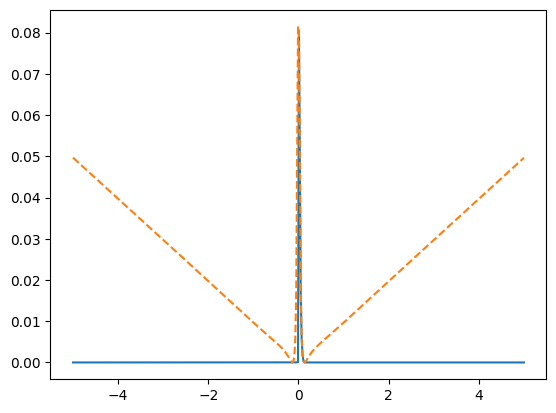

In [401]:
plt.plot(frange, array2)
plt.plot(ωrange, -SigmaPS_array, ls = '--')
#plt.xlim(-1,1)
#plt.ylim(-0.01, 0)

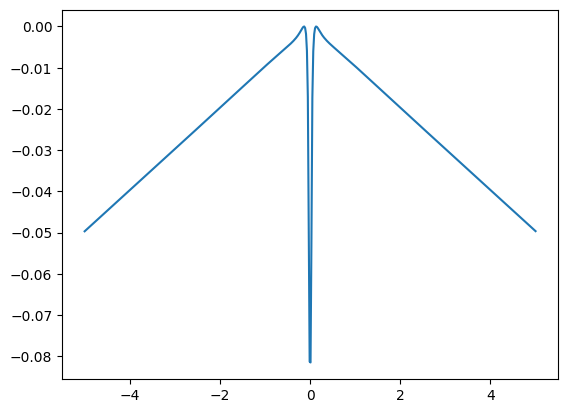

In [381]:
def SigmaPS(ω, mf, mb, T):

    mp = mf + mb
    mm = abs(mb-mf)
    res = (np.heaviside(ω**2 - mp**2, 0.5) - np.heaviside(mm**2 - ω**2,0.5))
    #res *=(mp -  ω)*(mm - ω)*np.sqrt((ω**2 - mm**2)*(ω**2 - mp**2))/64/np.pi/ω**3
    res *=(mp -  ω)*(mm + ω)*np.sqrt((ω**2 - mm**2)*(ω**2 - mp**2))/64/np.pi/ω**3
    res *=(1/(np.tanh((ω**2 + mm*mp)/4/ω/T)) + np.tanh((ω**2 - mm*mp)/4/ω/T))
    return np.nan_to_num(res)
    
ωrange = np.linspace(-5, 5, 500)

SigmaPS_array = np.array([SigmaPS(i, 0.001, 0.134, 0.206) for i in ωrange])#Sigma     #[SigmaP(i, 1, 0, 0.1) for i in ωrange]
#SigmaS_array = np.array([SigmaP(-i, 0., 0.134, 0.01) for i in ωrange])#pions

plt.plot(ωrange, SigmaPS_array)
#plt.xlim(-1,1)
#plt.ylim(-0.1, 0)
#Check if we can reproduce 3.11(2007) from above equation

/tmp/ipykernel_61580/2891462623.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  res *=(1/(np.tanh((ω**2 + mm*mp)/4/ω/T)) + np.tanh((ω**2 - mm*mp)/4/ω/T))


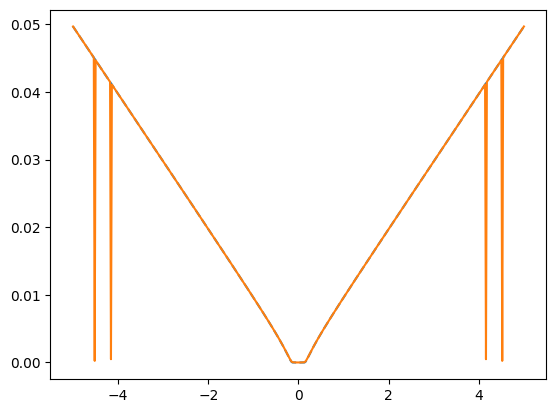

In [142]:
def SigmaPS1(ω, mf, mb, T):

    mp = mf + mb
    mm = abs(mf-mb)
    res = (np.heaviside(ω**2 - mp**2, 0.5) - np.heaviside(mm**2 - ω**2,0.5))
    #res *=(mp -  ω)*(mm - ω)*np.sqrt((ω**2 - mm**2)*(ω**2 - mp**2))/64/np.pi/ω**3
    res *=(mp -  ω)*(mm + ω)*np.sqrt((ω**2 - mm**2)*(ω**2 - mp**2))/64/np.pi/ω**3
    res *=(1/(np.tanh((ω**2 + mm*mp)/4/ω/T)) + np.tanh((ω**2 - mm*mp)/4/ω/T))
    return np.nan_to_num(res)
    
ωrange = np.linspace(-5, 5, 500)

SigmaPS1_array = np.array([SigmaPS1(i, 0., 0.134, 0.) for i in ωrange])#Sigma     #[SigmaP(i, 1, 0, 0.1) for i in ωrange]
#SigmaS_array = np.array([SigmaP(-i, 0., 0.134, 0.01) for i in ωrange])#pions

plt.plot(ωrange, -SigmaPS1_array, ls = '--')
#plt.plot(ωrange, SigmaPS_array, ls = '--')
plt.plot(frange, array2)
#plt.xlim(-1, 1)